In [36]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle

In [2]:
df = pd.read_csv("mail_data.csv")

In [3]:
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [4]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [5]:
df.dtypes

Category    object
Message     object
dtype: object

In [6]:
df["Category"].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [7]:
df["Category"]=df["Category"].replace(
    {"ham":0,"spam":1}
)

C:\Users\Harsh Ajit Jaiswal\AppData\Local\Temp\ipykernel_11796\822232889.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Category"]=df["Category"].replace(


In [8]:
df.dtypes

Category     int64
Message     object
dtype: object

In [9]:
df.groupby("Category")["Message"].value_counts()

Category  Message                                                                                                                                                                     
0         Sorry, I'll call later                                                                                                                                                          30
          I cant pick the phone right now. Pls send a message                                                                                                                             12
          Ok...                                                                                                                                                                           10
          7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st "Ur Lovely Friendship"... good morning dear                          4
          Ok                                                 

In [10]:
x=df["Message"]    #--->Input Columns
y=df["Category"]   #--->Output Columns

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=3, stratify=y)

In [12]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

In [13]:
x_train = feature_extraction.fit_transform(X_train)
x_test = feature_extraction.transform(X_test)

In [14]:
print(x_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 30385 stored elements and shape (3900, 6918)>
  Coords	Values
  (0, 3550)	0.3319199747550648
  (0, 4602)	0.4491390920930876
  (0, 3078)	0.5321683481087262
  (0, 2715)	0.5020443632148295
  (0, 6868)	0.39096229095379553
  (1, 6722)	0.2594033691969645
  (1, 5703)	0.2766905636849752
  (1, 5377)	0.24353909895938514
  (1, 5033)	0.23997972764829373
  (1, 230)	0.22958379778928287
  (1, 1521)	0.20447055549134635
  (1, 316)	0.24171895196096208
  (1, 1065)	0.25180680066431277
  (1, 5699)	0.23228322009677177
  (1, 3730)	0.22585468172338274
  (1, 4441)	0.2594033691969645
  (1, 1651)	0.19219835703029306
  (1, 104)	0.3355392532603266
  (1, 585)	0.2925548339225545
  (1, 1836)	0.22830085975120265
  (1, 239)	0.25180680066431277
  (2, 2985)	0.23238282331719645
  (2, 4270)	0.21536390676980346
  (2, 6860)	0.2561411617959209
  (2, 1992)	0.21690869449074734
  :	:
  (3897, 6305)	0.25877288173543084
  (3897, 3682)	0.304268433999742
  (3897, 623)	0.2

In [14]:
print(x_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 30385 stored elements and shape (3900, 6918)>
  Coords	Values
  (0, 3550)	0.3319199747550648
  (0, 4602)	0.4491390920930876
  (0, 3078)	0.5321683481087262
  (0, 2715)	0.5020443632148295
  (0, 6868)	0.39096229095379553
  (1, 6722)	0.2594033691969645
  (1, 5703)	0.2766905636849752
  (1, 5377)	0.24353909895938514
  (1, 5033)	0.23997972764829373
  (1, 230)	0.22958379778928287
  (1, 1521)	0.20447055549134635
  (1, 316)	0.24171895196096208
  (1, 1065)	0.25180680066431277
  (1, 5699)	0.23228322009677177
  (1, 3730)	0.22585468172338274
  (1, 4441)	0.2594033691969645
  (1, 1651)	0.19219835703029306
  (1, 104)	0.3355392532603266
  (1, 585)	0.2925548339225545
  (1, 1836)	0.22830085975120265
  (1, 239)	0.25180680066431277
  (2, 2985)	0.23238282331719645
  (2, 4270)	0.21536390676980346
  (2, 6860)	0.2561411617959209
  (2, 1992)	0.21690869449074734
  :	:
  (3897, 6305)	0.25877288173543084
  (3897, 3682)	0.304268433999742
  (3897, 623)	0.2

In [14]:
print(x_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 30385 stored elements and shape (3900, 6918)>
  Coords	Values
  (0, 3550)	0.3319199747550648
  (0, 4602)	0.4491390920930876
  (0, 3078)	0.5321683481087262
  (0, 2715)	0.5020443632148295
  (0, 6868)	0.39096229095379553
  (1, 6722)	0.2594033691969645
  (1, 5703)	0.2766905636849752
  (1, 5377)	0.24353909895938514
  (1, 5033)	0.23997972764829373
  (1, 230)	0.22958379778928287
  (1, 1521)	0.20447055549134635
  (1, 316)	0.24171895196096208
  (1, 1065)	0.25180680066431277
  (1, 5699)	0.23228322009677177
  (1, 3730)	0.22585468172338274
  (1, 4441)	0.2594033691969645
  (1, 1651)	0.19219835703029306
  (1, 104)	0.3355392532603266
  (1, 585)	0.2925548339225545
  (1, 1836)	0.22830085975120265
  (1, 239)	0.25180680066431277
  (2, 2985)	0.23238282331719645
  (2, 4270)	0.21536390676980346
  (2, 6860)	0.2561411617959209
  (2, 1992)	0.21690869449074734
  :	:
  (3897, 6305)	0.25877288173543084
  (3897, 3682)	0.304268433999742
  (3897, 623)	0.2

C:\Users\Harsh Ajit Jaiswal\AppData\Local\Temp\ipykernel_11796\1722787247.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette=['#ff4d4d', '#4dff4d'])


<Axes: xlabel='Category'>

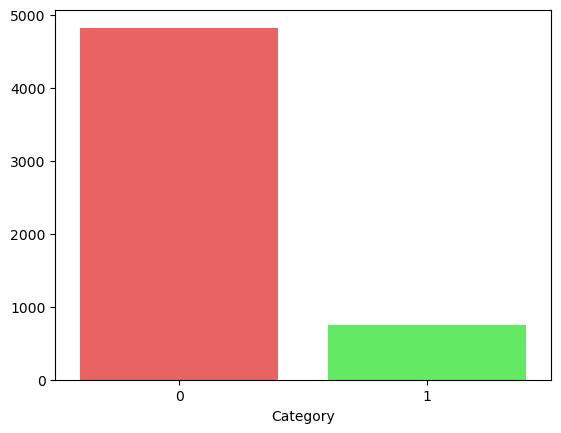

In [18]:
category_counts = y.value_counts().sort_index()

sns.barplot(x=category_counts.index, y=category_counts.values, palette=['#ff4d4d', '#4dff4d'])

In [19]:
model = LogisticRegression()
model.fit(x_train, Y_train)

LogisticRegression()

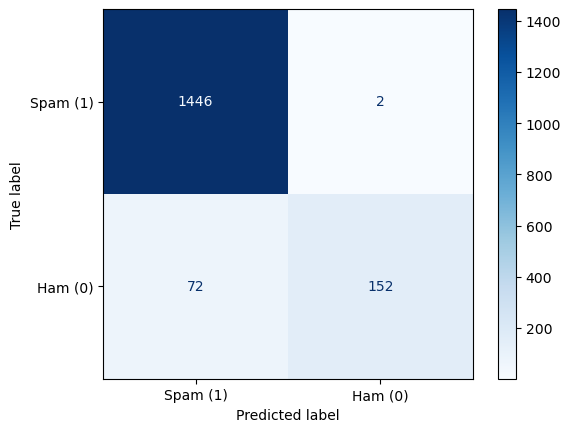

In [32]:
prediction_on_test_data = model.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(Y_test, prediction_on_test_data)

# Plot the Confusion Matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Spam (1)', 'Ham (0)'])
disp.plot(cmap=plt.cm.Blues, values_format='d')

In [33]:
f1 = (2*1446)/(2*1446+2+152)
print(f"F1 score:{f1}") 

F1 score:0.9494418910045962


In [38]:
MODEL_FILE = 'logistic_regression_model.pkl'
VECTORIZER_FILE = 'tfidf_vectorizer.pkl'

with open(MODEL_FILE, 'wb') as file:
    pickle.dump(model, file)
    
with open(VECTORIZER_FILE, 'wb') as file:
    pickle.dump(feature_extraction, file)